# Material and methods
**Study area**
This study was conducted at the Patrimoniales and Los Bloques residences on campus. A measurement point was identified in both residences where radon and temperature measurements were taken. Fifteen measurements were taken from 10 am to 12 am daily every hour at all residence hall measurement points. The average radon and temperature concentrations of each measurement point were calculated using the results of these measurements. Then, the average radon and temperature concentrations were determined by taking the average of fifteen different measurement points in the same residence. In other words, the radon and temperature concentrations in residence were calculated using the average of six measurements.
![](radon_image.jpg) 
![](thermometer.jpg)
**Experimental method**
It is important to consider the following characteristics:
* The place must be closed, and the radon meter must be static and approximately 50 cm above the ground and on the ground floor of the home.
* It must be 150 cm away from any ventilation. 
* It should not be exposed to sunlight, humidity, water, and dust. 

The equipment configuration used for this study was the measurement range of 3600s and the unit of measurement pCi/L. The measurement was made from 10:00 am to 00:00 am every hour. Subsequently, an excel file was created where we placed the measurements obtained, adding other characteristics such as temperature and a qualitative description of the climate.


# Results... so far

# Descriptive analysis of the project
This first part of the results shows an descriptive analysis of the data that was collected so far.
**Whole analysis:**
* some statistics
* scatter plot (radon vs hour; radon vs temperature)
* Covariance matrix

**Each house:**
* some statistics
* Boxplot
* scatter graph (radon vs hour; radon vs temperature)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler #escalating to aplly to the dataset

In [ ]:
data = pd.read_csv('radon11.csv', sep=',')  #we get the data

In [ ]:
#data = data['Temperatura (C)'].astype('float64')

In [ ]:
data.head(20)

,Casa,house code,hour,day,Hora,[] RADON (pCi/L),[] RADON (Bq/m3),effective dose [mSv/y],20 hours effective dose [mSv],Temperatura (C),clima
0,pat 37,P-01,1.0,03/08/2022,10:00:00,0.70,25.90,0.44030,0.459170,23.8,soleado
1,pat 37,P-01,2.0,03/08/2022,11:00:00,0.72,26.64,0.45288,0.472289,23.8,soleado
2,pat 37,P-01,3.0,03/08/2022,12:00:00,0.67,24.79,0.42143,0.439491,21.1,soleado
3,pat 37,P-01,4.0,03/08/2022,13:00:00,0.64,23.68,0.40256,0.419813,21.2,Soleado
4,pat 37,P-01,5.0,03/08/2022,14:00:00,0.70,25.90,0.44030,0.459170,21.3,Soleado
5,pat 37,P-01,6.0,03/08/2022,15:00:00,0.75,27.75,0.47175,0.491968,21.4,Soleado
6,pat 37,P-01,7.0,03/08/2022,16:00:00,0.75,27.75,0.47175,0.491968,21.5,soleado
7,pat 37,P-01,8.0,03/08/2022,17:00:00,0.67,24.79,0.42143,0.439491,21.6,despejado
8,pat 37,P-01,9.0,03/08/2022,18:00:00,0.70,25.90,0.44030,0.459170,21.7,Noche
9,pat 37,P-01,10.0,03/08/2022,19:00:00,0.64,23.68,0.40256,0.419813,21.7,Noche


In [ ]:
data.dtypes #check variable types

Casa                              object
house code                        object
hour                             float64
day                               object
Hora                              object
[] RADON (pCi/L)                 float64
[] RADON (Bq/m3)                 float64
effective dose [mSv/y]           float64
20 hours effective dose [mSv]    float64
Temperatura (C)                  float64
clima                             object
dtype: object

In [ ]:
pd.DataFrame.describe(data)  #desciptive analysis whole dataset

,hour,[] RADON (pCi/L),[] RADON (Bq/m3),effective dose [mSv/y],20 hours effective dose [mSv],Temperatura (C)
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,8.000000,0.523370,19.364704,0.329200,0.343309,22.458704
std,4.328517,0.289956,10.728371,0.182382,0.190199,0.845284
min,1.000000,0.050000,1.850000,0.031450,0.032798,20.600000
25%,4.000000,0.270000,9.990000,0.169830,0.177108,21.800000
50%,8.000000,0.525000,19.425000,0.330225,0.344377,22.500000
75%,12.000000,0.750000,27.750000,0.471750,0.491968,23.100000
max,15.000000,1.290000,47.730000,0.811410,0.846185,24.900000


In [ ]:
data['[] RADON (Bq/m3)'].mean()

19.3647037037037

In [ ]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 20.3 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


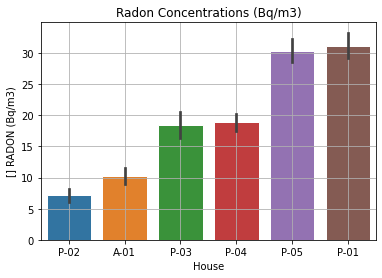

In [ ]:
order = data.groupby('house code').mean().sort_values('[] RADON (Bq/m3)').index
sns.barplot(data=data,x= 'house code', y='[] RADON (Bq/m3)',  edgecolor = 'w',
            order=order)
plt.title('Radon Concentrations (Bq/m3)')
plt.xlabel('House')
plt.grid(True)
plt.savefig("radon_concentrations.png")
plt.show()


<AxesSubplot:xlabel='Temperatura (C)', ylabel='[] RADON (Bq/m3)'>

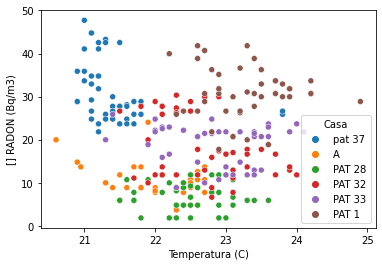

In [ ]:
sns.scatterplot(data=data, x = 'Temperatura (C)', y = '[] RADON (Bq/m3)',hue = 'Casa')

Boxplot 

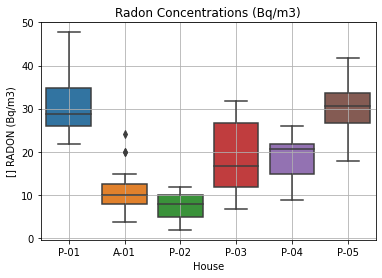

In [ ]:
sns.color_palette("mako", as_cmap=True)
sns.boxplot(data=data, x='house code', y='[] RADON (Bq/m3)')
plt.title('Radon Concentrations (Bq/m3)')
plt.xlabel('House')
plt.grid(True)
plt.savefig("radon_concentrations_boxplot.png")
plt.show()

<AxesSubplot:ylabel='Frequency'>

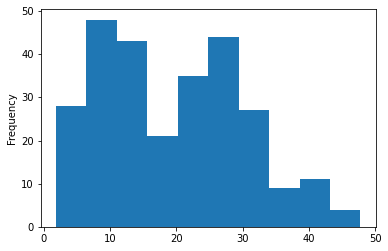

In [ ]:
data['[] RADON (Bq/m3)'].plot.hist()

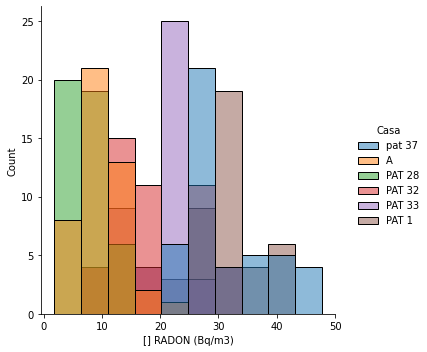

In [ ]:
sns.displot(data, x = '[] RADON (Bq/m3)', hue = 'Casa')

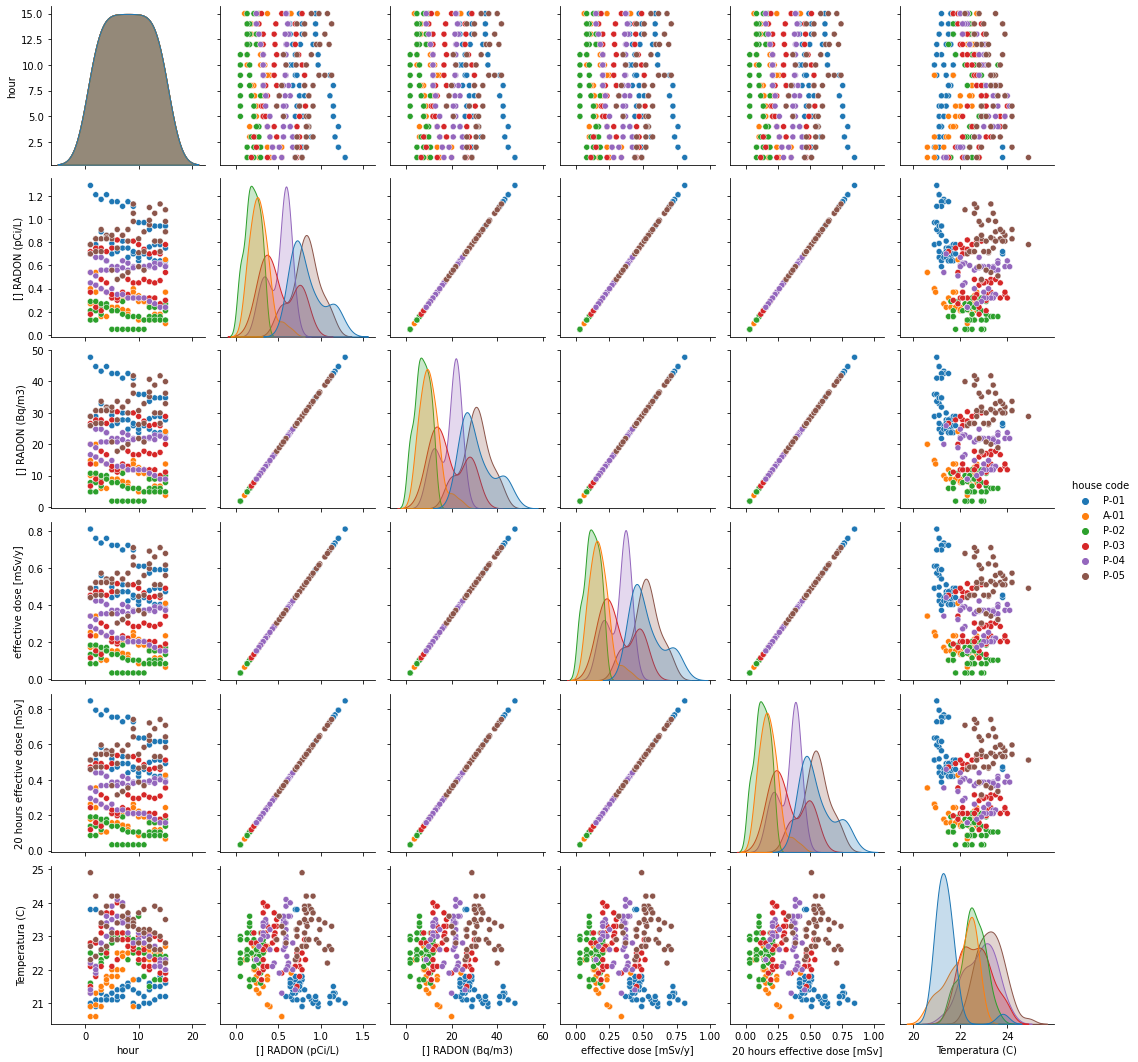

In [ ]:
sns.pairplot(data,, hue = 'house code') #this allow us to see a graph of the relation but does not work when we have a lot of variables


# Each house analysis
This part analyze how is the radon concentration behaviour in each measured house.

## Pat 37

This results corresponds to Pat 37

In [ ]:
pat_37 = data[(data['Casa']=='pat 37')]
pat_37 = pd.DataFrame(pat_37)
pat_37
#print(pd.DataFrame.describe(pat_37))

,Casa,house code,hour,day,Hora,[] RADON (pCi/L),[] RADON (Bq/m3),effective dose [mSv/y],20 hours effective dose [mSv],Temperatura (C),clima
0,pat 37,P-01,1.0,03/08/2022,10:00:00,0.70,25.90,0.44030,0.459170,23.8,soleado
1,pat 37,P-01,2.0,03/08/2022,11:00:00,0.72,26.64,0.45288,0.472289,23.8,soleado
2,pat 37,P-01,3.0,03/08/2022,12:00:00,0.67,24.79,0.42143,0.439491,21.1,soleado
3,pat 37,P-01,4.0,03/08/2022,13:00:00,0.64,23.68,0.40256,0.419813,21.2,Soleado
4,pat 37,P-01,5.0,03/08/2022,14:00:00,0.70,25.90,0.44030,0.459170,21.3,Soleado
5,pat 37,P-01,6.0,03/08/2022,15:00:00,0.75,27.75,0.47175,0.491968,21.4,Soleado
6,pat 37,P-01,7.0,03/08/2022,16:00:00,0.75,27.75,0.47175,0.491968,21.5,soleado
7,pat 37,P-01,8.0,03/08/2022,17:00:00,0.67,24.79,0.42143,0.439491,21.6,despejado
8,pat 37,P-01,9.0,03/08/2022,18:00:00,0.70,25.90,0.44030,0.459170,21.7,Noche
9,pat 37,P-01,10.0,03/08/2022,19:00:00,0.64,23.68,0.40256,0.419813,21.7,Noche


In [ ]:
print(pd.DataFrame.describe(pat_37))

            hour  [] RADON (pCi/L)  [] RADON (Bq/m3)  effective dose [mSv/y]  \
count  45.000000         45.000000         45.000000               45.000000   
mean    8.000000          0.841778         31.145778                0.529478   
std     4.369314          0.193476          7.158628                0.121697   
min     1.000000          0.590000         21.830000                0.371110   
25%     4.000000          0.700000         25.900000                0.440300   
50%     8.000000          0.780000         28.860000                0.490620   
75%    12.000000          0.940000         34.780000                0.591260   
max    15.000000          1.290000         47.730000                0.811410   

       20 hours effective dose [mSv]  Temperatura (C)  
count                      45.000000        45.000000  
mean                        0.552170        21.417778  
std                         0.126912         0.576939  
min                         0.387015        20.900000  

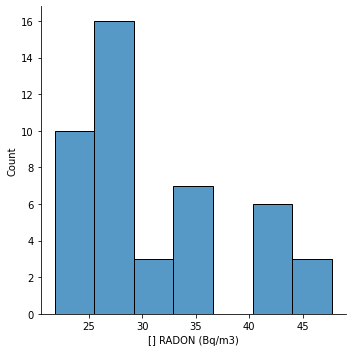

In [ ]:
sns.displot(data[(data['Casa']=='pat 37')], x= '[] RADON (Bq/m3)')
plt.show()

<AxesSubplot:xlabel='hour', ylabel='[] RADON (Bq/m3)'>

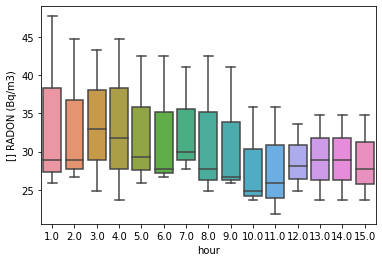

In [ ]:
sns.boxplot(data=data[(data['Casa']=='pat 37')], x='hour', y='[] RADON (Bq/m3)')

<AxesSubplot:xlabel='hour', ylabel='[] RADON (Bq/m3)'>

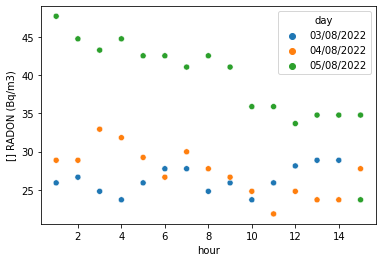

In [ ]:
sns.scatterplot(data=pat_37, x = 'hour', y = '[] RADON (Bq/m3)',hue = 'day')

<AxesSubplot:xlabel='Temperatura (C)', ylabel='[] RADON (Bq/m3)'>

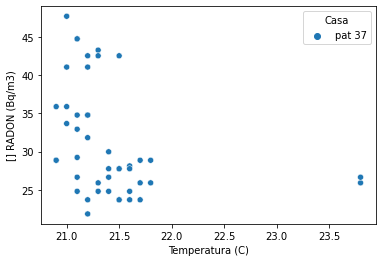

In [ ]:
sns.scatterplot(data=pat_37, x = 'Temperatura (C)', y = '[] RADON (Bq/m3)',hue = 'Casa')

## Bloque A

This results corresponds to bloque A

            hour  [] RADON (pCi/L)  [] RADON (Bq/m3)  effective dose [mSv/y]  \
count  45.000000         45.000000         45.000000               45.000000   
mean    8.000000          0.276889         10.244889                0.174163   
std     4.369314          0.116264          4.301777                0.073130   
min     1.000000          0.100000          3.700000                0.062900   
25%     4.000000          0.210000          7.770000                0.132090   
50%     8.000000          0.270000          9.990000                0.169830   
75%    12.000000          0.340000         12.580000                0.213860   
max    15.000000          0.650000         24.050000                0.408850   

       20 hours effective dose [mSv]  Temperatura (C)  
count                      45.000000        45.000000  
mean                        0.181627        22.007778  
std                         0.076264         0.630652  
min                         0.065596        20.600000  

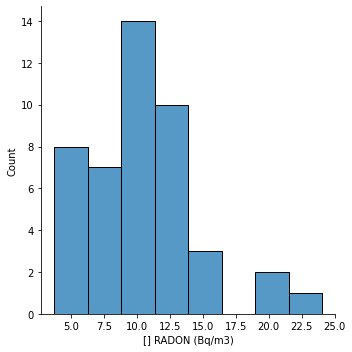

In [ ]:
bloque_A4 = data[(data['Casa']=='A')]
print(pd.DataFrame.describe(bloque_A4))
#bloque_A4
sns.displot(bloque_A4, x= '[] RADON (Bq/m3)')

<AxesSubplot:xlabel='hour', ylabel='[] RADON (Bq/m3)'>

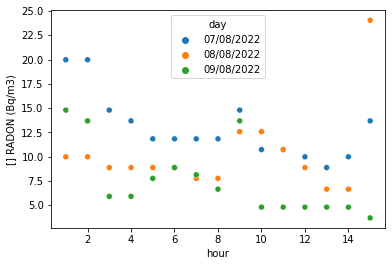

In [ ]:
sns.scatterplot(data=bloque_A4, x = 'hour', y = '[] RADON (Bq/m3)',hue = 'day')

<AxesSubplot:xlabel='Temperatura (C)', ylabel='[] RADON (Bq/m3)'>

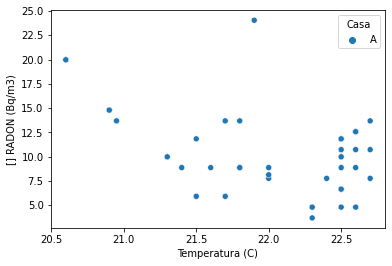

In [ ]:
sns.scatterplot(data=bloque_A4, x = 'Temperatura (C)', y = '[] RADON (Bq/m3)',hue = 'Casa')

<AxesSubplot:xlabel='hour', ylabel='[] RADON (Bq/m3)'>

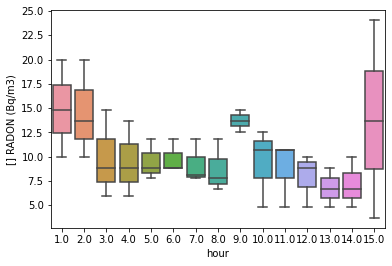

In [ ]:
sns.boxplot(data=bloque_A4, x='hour', y='[] RADON (Bq/m3)')

## Pat 28

This results corresponds to Pat 28

            hour  [] RADON (pCi/L)  [] RADON (Bq/m3)  effective dose [mSv/y]  \
count  45.000000         45.000000         45.000000               45.000000   
mean    8.000000          0.192444          7.120444                0.121048   
std     4.369314          0.087234          3.227664                0.054870   
min     1.000000          0.050000          1.850000                0.031450   
25%     4.000000          0.130000          4.810000                0.081770   
50%     8.000000          0.210000          7.770000                0.132090   
75%    12.000000          0.270000          9.990000                0.169830   
max    15.000000          0.320000         11.840000                0.201280   

       20 hours effective dose [mSv]  Temperatura (C)  
count                      45.000000        45.000000  
mean                        0.126235        22.528889  
std                         0.057222         0.492961  
min                         0.032798        21.500000  

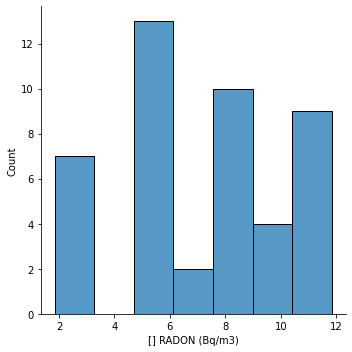

In [ ]:
pat_28 = data[(data['Casa']=='PAT 28')]
print(pd.DataFrame.describe(pat_28))
#pat_28
sns.displot(pat_28, x= '[] RADON (Bq/m3)')

<AxesSubplot:xlabel='hour', ylabel='[] RADON (Bq/m3)'>

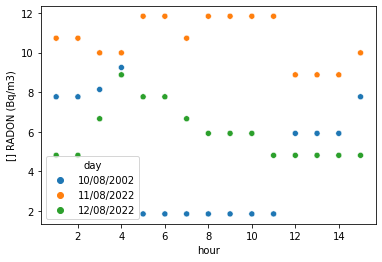

In [ ]:
sns.scatterplot(data=pat_28, x = 'hour', y = '[] RADON (Bq/m3)',hue = 'day')

<AxesSubplot:xlabel='Temperatura (C)', ylabel='[] RADON (Bq/m3)'>

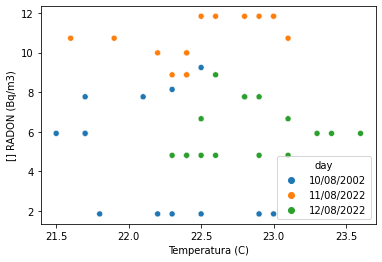

In [ ]:
sns.scatterplot(data=pat_28, x = 'Temperatura (C)', y = '[] RADON (Bq/m3)',hue = 'day')

<AxesSubplot:xlabel='hour', ylabel='[] RADON (Bq/m3)'>

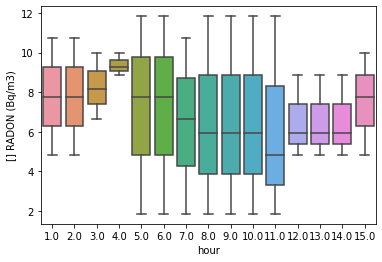

In [ ]:
sns.boxplot(data=pat_28, x='hour', y='[] RADON (Bq/m3)')

## Pat 32

This results corresponds to Pat 32

            hour  [] RADON (pCi/L)  [] RADON (Bq/m3)  effective dose [mSv/y]  \
count  45.000000         45.000000         45.000000               45.000000   
mean    8.000000          0.498667         18.450667                0.313661   
std     4.369314          0.202211          7.481789                0.127190   
min     1.000000          0.180000          6.660000                0.113220   
25%     4.000000          0.320000         11.840000                0.201280   
50%     8.000000          0.450000         16.650000                0.283050   
75%    12.000000          0.720000         26.640000                0.452880   
max    15.000000          0.860000         31.820000                0.540940   

       20 hours effective dose [mSv]  Temperatura (C)  
count                      45.000000        45.000000  
mean                        0.327104        22.675556  
std                         0.132641         0.639657  
min                         0.118072        21.500000  

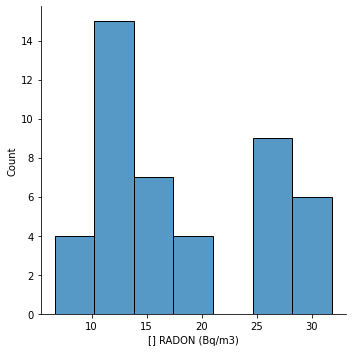

In [ ]:
pat_32 = data[(data['Casa']=='PAT 32')]
print(pd.DataFrame.describe(pat_32))
#pat_32
sns.displot(pat_32, x= '[] RADON (Bq/m3)')

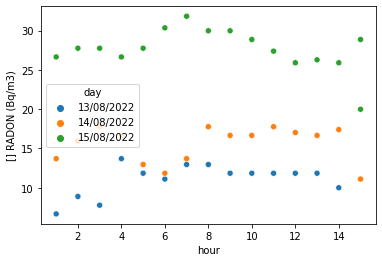

In [ ]:
sns.scatterplot(data=pat_32, x = 'hour', y = '[] RADON (Bq/m3)',hue = 'day')
plt.show()

<AxesSubplot:xlabel='house code', ylabel='[] RADON (Bq/m3)'>

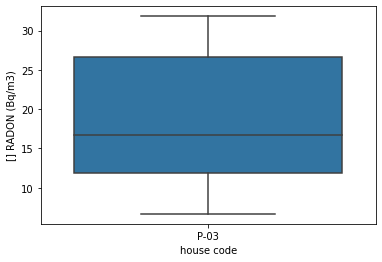

In [ ]:
sns.boxplot(data=pat_32, x='hour', y='[] RADON (Bq/m3)')

In [ ]:
fig = px.scatter(df_mean, x=df_mean.index, y="NPN1", error_y=h)
fig.update_layout(layout, title_text='Mean NPN1 by site with 95% confidence intervals', width=600, height=400)
fig.update_traces(marker_color='black')
fig.update_xaxes(type='category')
py.plot(fig, filename='jmp-confidence intervals')
fig.show()

NameError: name 'px' is not defined

## Pat 33

This results corresponds to Pat 33

            hour  [] RADON (pCi/L)  [] RADON (Bq/m3)  effective dose [mSv/y]  \
count  45.000000         45.000000         45.000000               45.000000   
mean    8.000000          0.509556         18.853556                0.320510   
std     4.369314          0.131994          4.883793                0.083024   
min     1.000000          0.240000          8.880000                0.150960   
25%     4.000000          0.400000         14.800000                0.251600   
50%     8.000000          0.560000         20.720000                0.352240   
75%    12.000000          0.590000         21.830000                0.371110   
max    15.000000          0.700000         25.900000                0.440300   

       20 hours effective dose [mSv]  Temperatura (C)  
count                      45.000000        45.000000  
mean                        0.334247        22.842222  
std                         0.086583         0.671325  
min                         0.157430        21.300000  

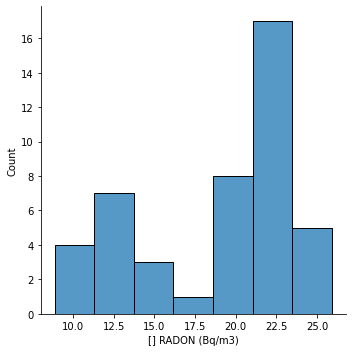

In [ ]:
pat_33 = data[(data['Casa']=='PAT 33')]
print(pd.DataFrame.describe(pat_33))
#pat_33
sns.displot(pat_33, x= '[] RADON (Bq/m3)')

<AxesSubplot:xlabel='hour', ylabel='[] RADON (Bq/m3)'>

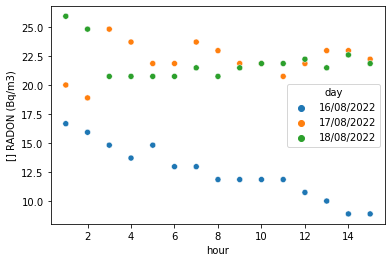

In [ ]:
sns.scatterplot(data=pat_33, x = 'hour', y = '[] RADON (Bq/m3)',hue = 'day')

<AxesSubplot:xlabel='hour', ylabel='[] RADON (Bq/m3)'>

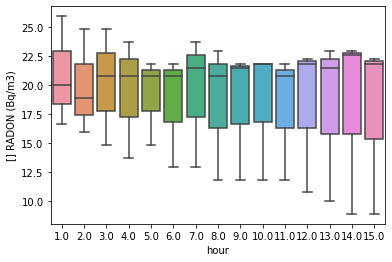

In [ ]:
sns.boxplot(data=pat_33, x='hour', y='[] RADON (Bq/m3)')

# Pat 1

            hour  [] RADON (pCi/L)  [] RADON (Bq/m3)  effective dose [mSv/y]  \
count  45.000000         45.000000         45.000000               45.000000   
mean    8.000000          0.820889         30.372889                0.516339   
std     4.369314          0.167207          6.186670                0.105173   
min     1.000000          0.480000         17.760000                0.301920   
25%     4.000000          0.720000         26.640000                0.452880   
50%     8.000000          0.830000         30.710000                0.522070   
75%    12.000000          0.910000         33.670000                0.572390   
max    15.000000          1.130000         41.810000                0.710770   

       20 hours effective dose [mSv]  Temperatura (C)  
count                      45.000000        45.000000  
mean                        0.538468        23.280000  
std                         0.109681         0.570327  
min                         0.314859        22.200000  

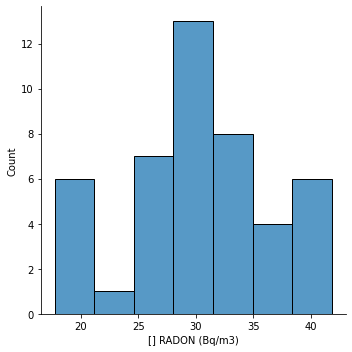

In [ ]:
pat_1 = data[(data['Casa']=='PAT 1')]
print(pd.DataFrame.describe(pat_1))
#pat_1
sns.displot(pat_1, x= '[] RADON (Bq/m3)')

# Covariance Matrix

The following will find if there is any relationship between the measure variables.

In [ ]:
#scaler = StandardScaler()   #scalator in order to normalize the data
#scaled = scaler.fit_transform(
#    data[['[] RADON (Bq/m3)', 'Temperatura (C)', 'hour']] #Im not interest in categorical data so i eliminate species
#)

In [ ]:
#covariance_matrix = np.cov(scaled.T)
#covariance_matrix

In [ ]:
#plt.figure(figsize=(10,10))
#sns.set(font_scale=1.5)
#hm = sns.heatmap(covariance_matrix,
#                 cbar=True,
#                 annot=True,
#                 square=True,
#                 fmt='.2f',
#                 annot_kws={'size': 12},
#                 yticklabels=['[] RADON (Bq/m3)','Temperatura (C)','hour'],
#                 xticklabels=['[] RADON (Bq/m3)','Temperatura (C)','hour'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b910699a-73d1-46df-b36d-6025a31c953f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>